# exploratory data analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Dataset shape:
(7767, 562)
First 5 elements of the dataset:
   tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc_Mad_3  tBodyAcc_Max_1  tBodyAcc_Max_2  tBodyAcc_Max_3  \
0       -0.953325      

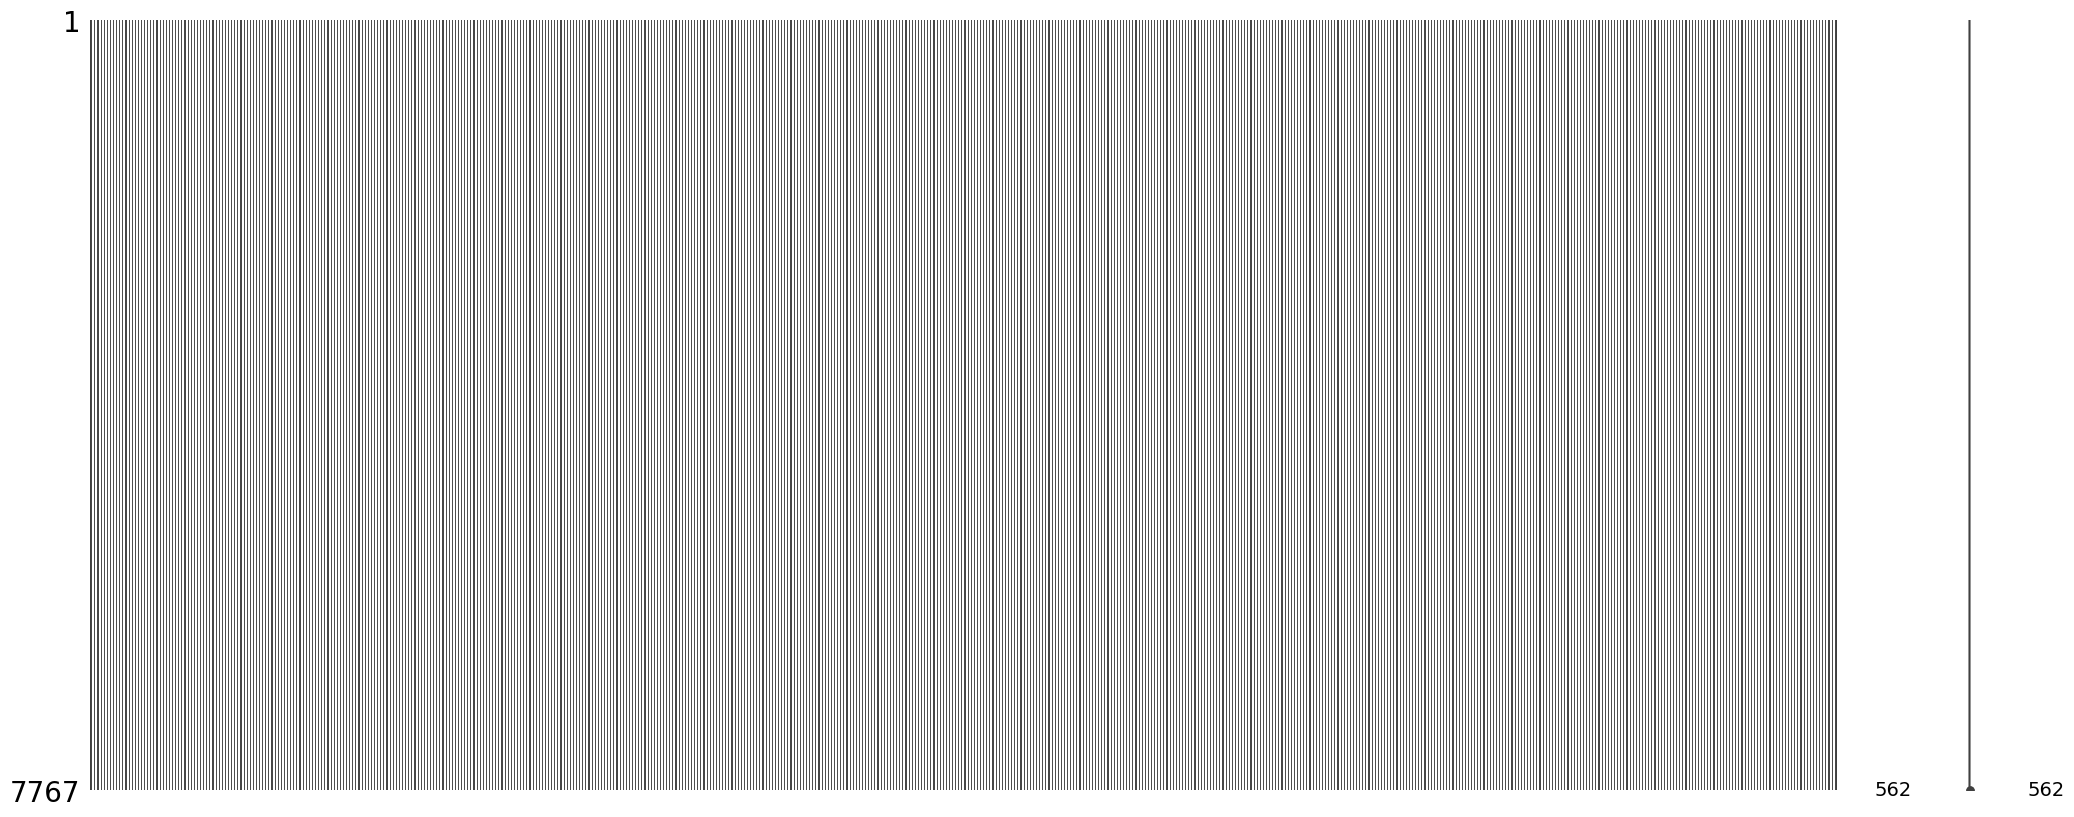

In [28]:
pd.options.display.max_columns = 200

activity_map = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS', 
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
    7: 'STAND_TO_SIT',
    8: 'SIT_TO_STAND',
    9: 'SIT_TO_LIE',
    10: 'LIE_TO_SIT',
    11: 'STAND_TO_LIE',
    12: 'LIE_TO_STAND'
}

df = pd.read_csv("../data/activity_train.csv")
print("Dataset shape:")
print(df.shape)

print("First 5 elements of the dataset:")
print(df.head())

print("Missing values:")
print(df.isnull().sum().sum())

print("Basic dataset stats:")
print(df.describe())

print("Dataset info:")
print(df.info())

print("Class distribution:")
print(df['activity'].value_counts())

print("Missing values:")
msno.matrix(df)

df['activity_name'] = df['activity'].map(activity_map)

In [29]:
df.duplicated().sum() 

print(df)

      tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
0            0.043580        -0.005970        -0.035054       -0.995381   
1            0.039480        -0.002131        -0.029067       -0.998348   
2            0.039978        -0.005153        -0.022651       -0.995482   
3            0.039785        -0.011809        -0.028916       -0.996194   
4            0.038758        -0.002289        -0.023863       -0.998241   
...               ...              ...              ...             ...   
7762         0.048048        -0.042445        -0.065884       -0.195448   
7763         0.037639         0.006430        -0.044345       -0.235372   
7764         0.037451        -0.002724         0.021009       -0.218281   
7765         0.044011        -0.004536        -0.051242       -0.219202   
7766         0.068954         0.001810        -0.080323       -0.269336   

      tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
0          -0.988366       

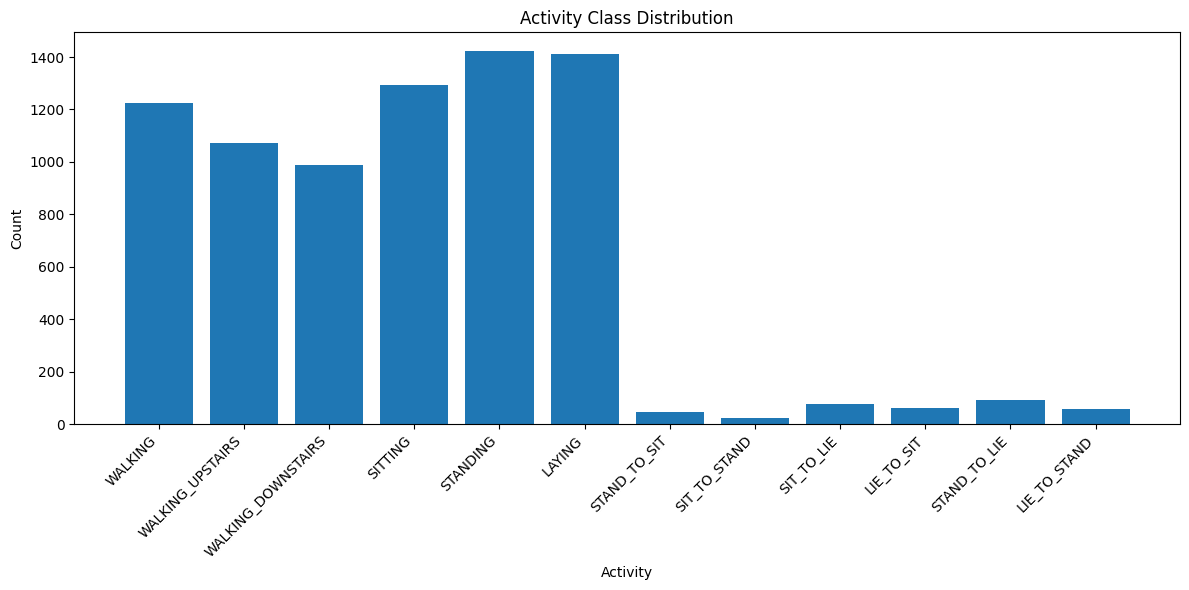

1: WALKING                   - 1226 samples
2: WALKING_UPSTAIRS          - 1073 samples
3: WALKING_DOWNSTAIRS        -  987 samples
4: SITTING                   - 1293 samples
5: STANDING                  - 1423 samples
6: LAYING                    - 1413 samples
7: STAND_TO_SIT              -   47 samples
8: SIT_TO_STAND              -   23 samples
9: SIT_TO_LIE                -   75 samples
10: LIE_TO_SIT                -   60 samples
11: STAND_TO_LIE              -   90 samples
12: LIE_TO_STAND              -   57 samples


In [30]:
# Class distribution
plt.figure(figsize=(12, 6))
counts = df['activity']. value_counts().sort_index()
plt.bar(range(len(counts)), counts.values)
plt. xticks(range(len(counts)), 
           [activity_map[i+1] for i in range(len(counts))], 
           rotation=45, ha='right')
plt.title('Activity Class Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print counts
for activity_id, count in counts.items():
    print(f"{activity_id}: {activity_map[activity_id]:25s} - {count:4d} samples")

Static activities:       4129 (53.2%)
Dynamic activities:    3286 (42.3%)
Transition activities:   352 (4.5%)


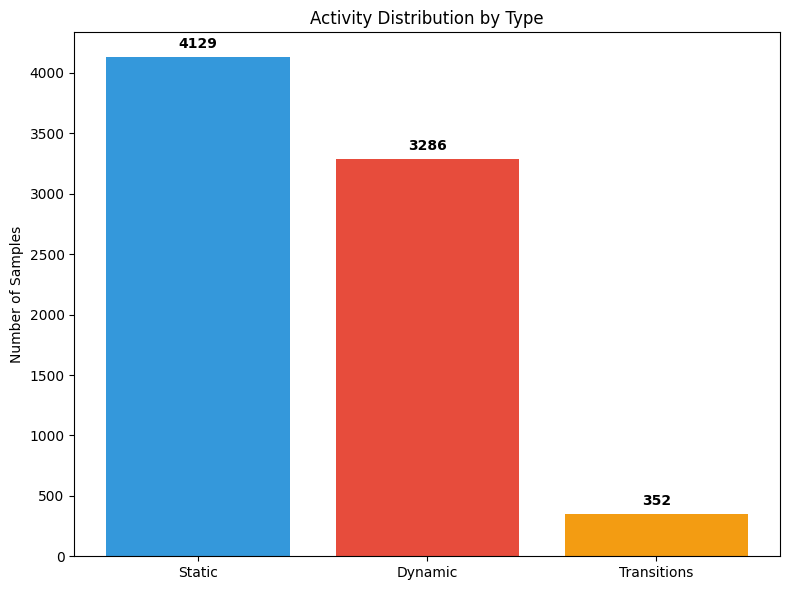

In [31]:
# Define activity groups by integer IDs
static = [4, 5, 6]  # SITTING, STANDING, LAYING
dynamic = [1, 2, 3]  # WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
transitions = [7, 8, 9, 10, 11, 12]  # All transitions

# Count by category
static_count = df[df['activity'].isin(static)].shape[0]
dynamic_count = df[df['activity'].isin(dynamic)].shape[0]
transition_count = df[df['activity'].isin(transitions)].shape[0]

print(f"Static activities:      {static_count: 4d} ({static_count/len(df)*100:.1f}%)")
print(f"Dynamic activities:    {dynamic_count:4d} ({dynamic_count/len(df)*100:.1f}%)")
print(f"Transition activities:  {transition_count:4d} ({transition_count/len(df)*100:.1f}%)")

# Visualize grouped
plt.figure(figsize=(8, 6))
categories = ['Static', 'Dynamic', 'Transitions']
counts_grouped = [static_count, dynamic_count, transition_count]
colors = ['#3498db', '#e74c3c', '#f39c12']
plt.bar(categories, counts_grouped, color=colors)
plt.title('Activity Distribution by Type')
plt.ylabel('Number of Samples')
for i, v in enumerate(counts_grouped):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

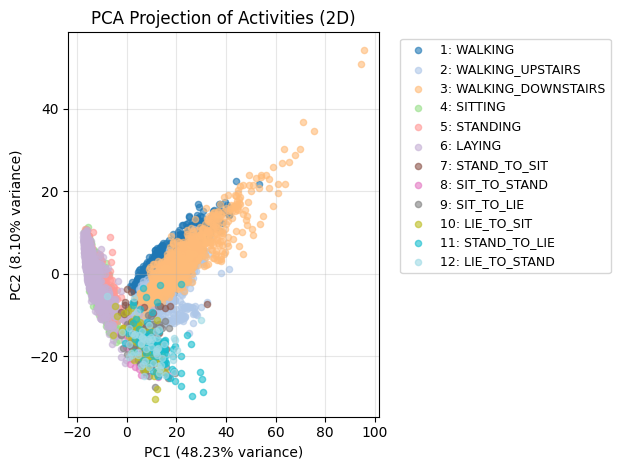

Variance explained by first 2 components: 56.34%


In [32]:
# Separate features and target
X = df.select_dtypes(include=[np.number]).drop(['activity', 'activity_name'], axis=1, errors='ignore')  # Drop target columns
y = df['activity']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2D
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

labels = df['activity_name'] if 'activity_name' in df.columns else y.astype(str)
colors = plt.cm.tab20(np.linspace(0, 1, labels.nunique()))
for i, act in enumerate(sorted(np.unique(y))):
    mask = (y == act)
    plt.scatter(X_pca[mask,0], X_pca[mask,1],
                label=f"{act}: {activity_map.get(act,act)}",
                alpha=0.6, s=20, color=colors[i])

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Projection of Activities (2D)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variance explained by first 2 components: "
      f"{pca.explained_variance_ratio_[: 2].sum():.2%}")

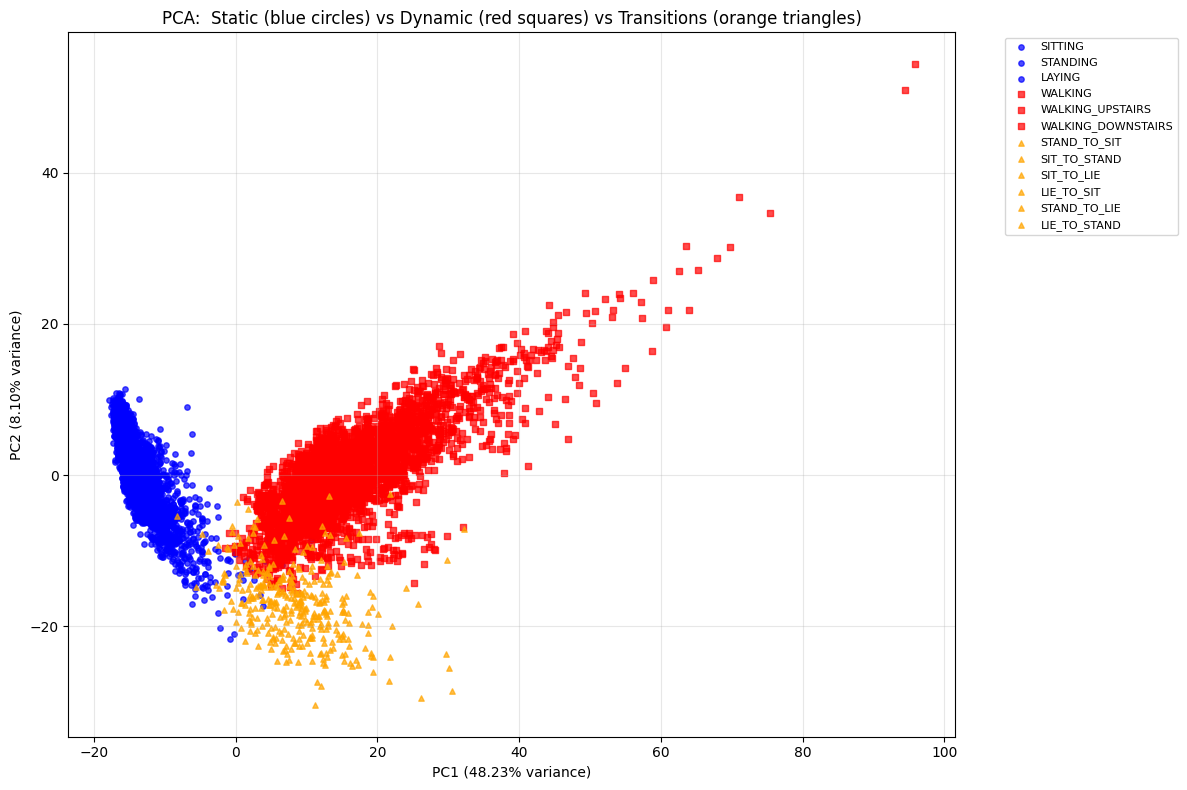

In [33]:
plt.figure(figsize=(12, 8))

for activity_id in static:
    mask = (y == activity_id)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=activity_map[activity_id], 
                alpha=0.7, s=15, color='blue', marker='o')

for activity_id in dynamic:
    mask = (y == activity_id)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=activity_map[activity_id], 
                alpha=0.7, s=15, color='red', marker='s')

for activity_id in transitions:
    mask = (y == activity_id)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=activity_map[activity_id], 
                alpha=0.7, s=15, color='orange', marker='^')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca. explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA:  Static (blue circles) vs Dynamic (red squares) vs Transitions (orange triangles)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/zb/tmbpzqhj4dxd92lmpmh07qv40000gn/T/ipykernel_75917/314342603.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=[activity_map[i] for i in range(1, 13)])


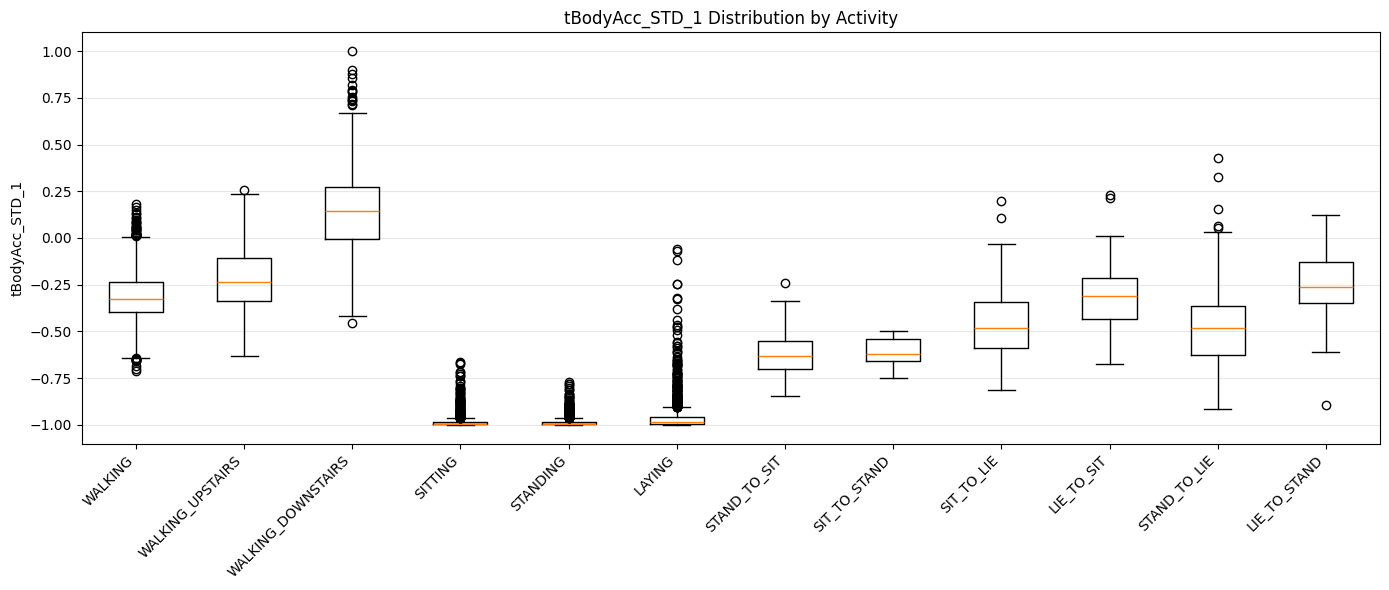

Static      : mean=-0.9734, std= 0.0593
Dynamic     : mean=-0.1469, std= 0.2590
Transitions : mean=-0.4281, std= 0.2271


In [34]:
# Example: Compare a feature across activities
feature_to_analyze = 'tBodyAcc_STD_1'  # Adjust to your actual column name

# Create boxplot
plt.figure(figsize=(14, 6))
data_to_plot = [df[df['activity'] == i][feature_to_analyze].values 
                for i in range(1, 13)]
bp = plt.boxplot(data_to_plot, labels=[activity_map[i] for i in range(1, 13)])
plt. xticks(rotation=45, ha='right')
plt.ylabel(feature_to_analyze)
plt.title(f'{feature_to_analyze} Distribution by Activity')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistical comparison
for activity_type, activity_ids in [('Static', static), 
                                     ('Dynamic', dynamic), 
                                     ('Transitions', transitions)]:
    mean_val = df[df['activity']. isin(activity_ids)][feature_to_analyze].mean()
    std_val = df[df['activity'].isin(activity_ids)][feature_to_analyze].std()
    print(f"{activity_type:12s}: mean={mean_val:7.4f}, std={std_val:7.4f}")

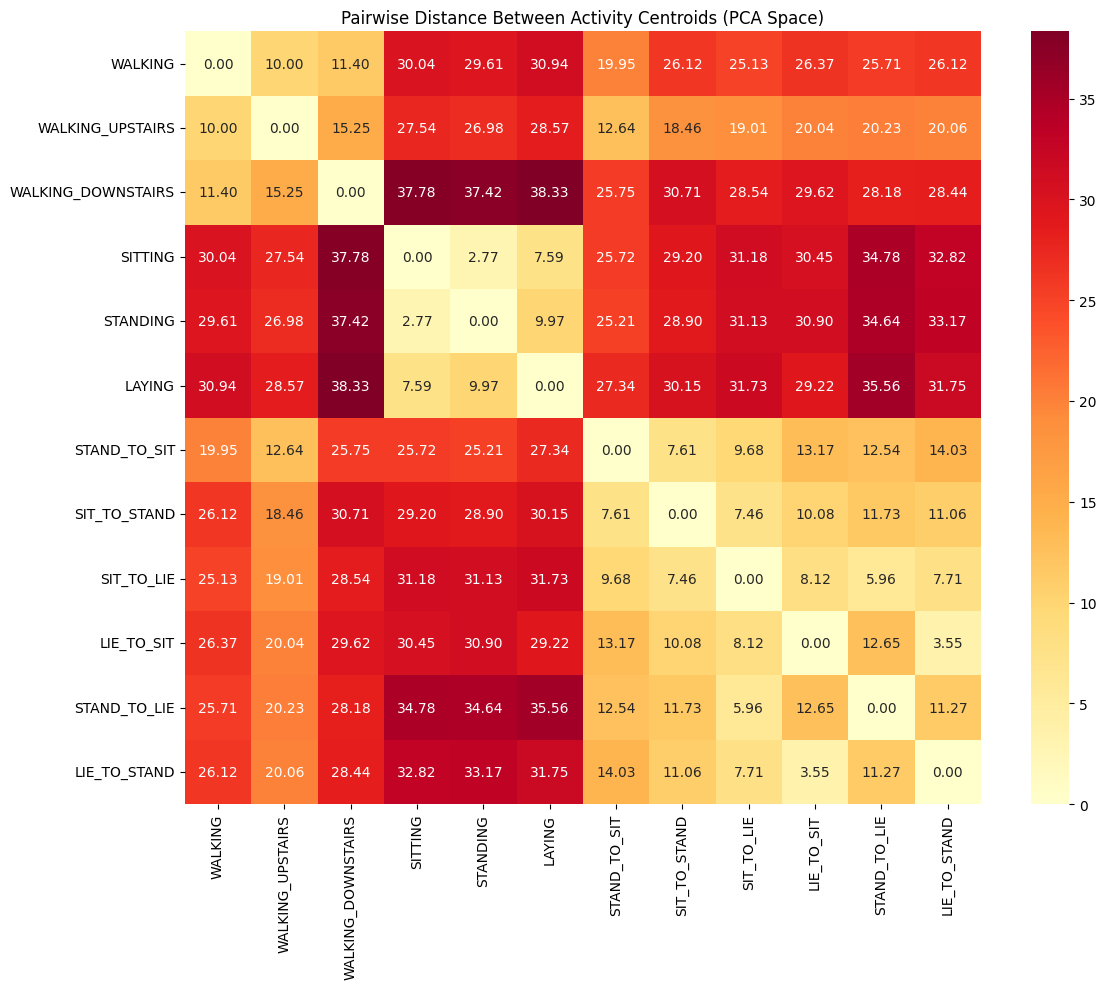

In [35]:
# Calculate pairwise distances between activity centroids in PCA space
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

centroids = {}
for activity_id in range(1, 13):
    mask = (y == activity_id)
    centroids[activity_id] = X_pca[mask]. mean(axis=0)

# Distance matrix
distance_matrix = np.zeros((12, 12))
for i in range(1, 13):
    for j in range(1, 13):
        distance_matrix[i-1, j-1] = euclidean(centroids[i], centroids[j])

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, 
            xticklabels=[activity_map[i] for i in range(1, 13)],
            yticklabels=[activity_map[i] for i in range(1, 13)],
            annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Pairwise Distance Between Activity Centroids (PCA Space)')
plt.tight_layout()
plt.show()

In [36]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"Total features: {X.shape[1]}")
print(f"Total classes: {len(df['activity'].unique())}")
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nClass balance:")
print(f"  Most common:   {activity_map[df['activity'].value_counts().idxmax()]} "
      f"({df['activity'].value_counts().max()} samples)")
print(f"  Least common: {activity_map[df['activity'].value_counts().idxmin()]} "
      f"({df['activity'].value_counts().min()} samples)")
print(f"  Imbalance ratio: {df['activity'].value_counts().max() / df['activity'].value_counts().min():.2f}x")
print("="*60)

DATASET SUMMARY
Total samples: 7767
Total features: 561
Total classes: 12

Missing values: 0

Class balance:
  Most common:   STANDING (1423 samples)
  Least common: SIT_TO_STAND (23 samples)
  Imbalance ratio: 61.87x
